# Live Hand Tracking

In [1]:
!pip install tensorflow tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

^C


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [7]:
cap.release()
cv2.destroyAllWindows()

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

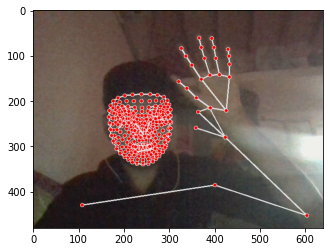

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else:
    np.zeros(1404)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.38469708,  0.5775584 , -1.01808608, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.38469708,  0.5775584 , -1.01808608, ...,  0.        ,
        0.        ,  0.        ])

# Creation and Training of LSTM Model

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [24]:
cap.release()
cv2.destroyAllWindows()

In [89]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [90]:
label_map = {label:num for num, label in enumerate(actions)}

In [91]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [92]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [93]:
np.array(sequences).shape

(90, 30, 1662)

In [94]:
np.array(labels).shape

(90,)

In [95]:
X = np.array(sequences)

In [96]:
X.shape

(90, 30, 1662)

In [97]:
y = to_categorical(labels).astype(int)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [99]:
y_test.shape

(5, 3)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [101]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [102]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [103]:
res = [.7, 0.2, 0.1]

In [104]:
actions[np.argmax(res)]

'hello'

In [105]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [106]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 11s 998ms/step - loss: 2.2557 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.2353 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 161ms/step - loss: 1.0047 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 154ms/step - loss: 1.0374 - categorical_accuracy: 0.4941
Epoch 5/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.9358 - categorical_accuracy: 0.5882
Epoch 6/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.7453 - categorical_accuracy: 0.6941
Epoch 7/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.6169 - categorical_accuracy: 0.7412
Epoch 8/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.4230 - categorical_accuracy: 0.8588
Epoch 9/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.6629 - categorical_accuracy

3/3 [==============================] - 0s 158ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 74/2000
3/3 [==============================] - 0s 157ms/step - loss: 0.0153 - categorical_accuracy: 0.9882
Epoch 75/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.0107 - categorical_accuracy: 0.9882
Epoch 76/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 77/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.0452 - categorical_accuracy: 0.9765
Epoch 78/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.0457 - categorical_accuracy: 0.9882
Epoch 79/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.1315 - categorical_accuracy: 0.9412
Epoch 80/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.2103 - categorical_accuracy: 0.9294
Epoch 81/2000
3/3 [==============================] - 1s 182ms/step - loss: 0.4165 - categorical_accuracy: 0.89

3/3 [==============================] - 0s 153ms/step - loss: 0.0302 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.0358 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.0351 - categorical_accuracy: 0.9882
Epoch 148/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.0456 - categorical_accuracy: 0.9882
Epoch 149/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.0159 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.0287 - categorical_accuracy: 0.9882
Epoch 151/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.0129 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.0437 - categorical_accuracy: 0.9882
Epoch 153/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.0266 - categorical_accura

3/3 [==============================] - 1s 156ms/step - loss: 1.6032e-04 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 159ms/step - loss: 1.5705e-04 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.5346e-04 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.5011e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.4681e-04 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 159ms/step - loss: 1.4324e-04 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 158ms/step - loss: 1.4023e-04 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.3727e-04 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 162ms/step - l

3/3 [==============================] - 0s 152ms/step - loss: 4.6307e-05 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 159ms/step - loss: 4.5662e-05 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 152ms/step - loss: 4.4984e-05 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 165ms/step - loss: 4.4378e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 159ms/step - loss: 4.3729e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 156ms/step - loss: 4.3154e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 155ms/step - loss: 4.2503e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 160ms/step - loss: 4.1979e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 158ms/step - l

3/3 [==============================] - 0s 159ms/step - loss: 1.9747e-05 - categorical_accuracy: 1.0000
Epoch 354/2000
3/3 [==============================] - 0s 159ms/step - loss: 1.9571e-05 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.9352e-05 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.9135e-05 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.8952e-05 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.8762e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.8564e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.8361e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 160ms/step - l

3/3 [==============================] - 1s 180ms/step - loss: 1.0336e-05 - categorical_accuracy: 1.0000
Epoch 423/2000
3/3 [==============================] - 1s 173ms/step - loss: 1.0255e-05 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 161ms/step - loss: 1.0165e-05 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0079e-05 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0006e-05 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 155ms/step - loss: 9.9251e-06 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 156ms/step - loss: 9.8311e-06 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 163ms/step - loss: 9.7498e-06 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 1s 166ms/step - l

3/3 [==============================] - 0s 163ms/step - loss: 6.0712e-06 - categorical_accuracy: 1.0000
Epoch 492/2000
3/3 [==============================] - 0s 162ms/step - loss: 6.0291e-06 - categorical_accuracy: 1.0000
Epoch 493/2000
3/3 [==============================] - 1s 167ms/step - loss: 5.9786e-06 - categorical_accuracy: 1.0000
Epoch 494/2000
3/3 [==============================] - 0s 163ms/step - loss: 5.9408e-06 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 0s 157ms/step - loss: 5.8931e-06 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 164ms/step - loss: 5.8538e-06 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 0s 162ms/step - loss: 5.8117e-06 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 164ms/step - loss: 5.7697e-06 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 152ms/step - l

3/3 [==============================] - 0s 161ms/step - loss: 3.8105e-06 - categorical_accuracy: 1.0000
Epoch 561/2000
3/3 [==============================] - 0s 154ms/step - loss: 3.7880e-06 - categorical_accuracy: 1.0000
Epoch 562/2000
3/3 [==============================] - 1s 164ms/step - loss: 3.7656e-06 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 0s 159ms/step - loss: 3.7417e-06 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 1s 169ms/step - loss: 3.7179e-06 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 1s 169ms/step - loss: 3.6955e-06 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 160ms/step - loss: 3.6772e-06 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 1s 164ms/step - loss: 3.6492e-06 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 160ms/step - l

3/3 [==============================] - 1s 169ms/step - loss: 2.5651e-06 - categorical_accuracy: 1.0000
Epoch 630/2000
3/3 [==============================] - 0s 157ms/step - loss: 2.5483e-06 - categorical_accuracy: 1.0000
Epoch 631/2000
3/3 [==============================] - 0s 161ms/step - loss: 2.5398e-06 - categorical_accuracy: 1.0000
Epoch 632/2000
3/3 [==============================] - 0s 156ms/step - loss: 2.5258e-06 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 0s 155ms/step - loss: 2.5118e-06 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 0s 162ms/step - loss: 2.4922e-06 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 1s 168ms/step - loss: 2.4767e-06 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 1s 166ms/step - loss: 2.4655e-06 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 1s 172ms/step - l

3/3 [==============================] - 0s 157ms/step - loss: 1.8064e-06 - categorical_accuracy: 1.0000
Epoch 699/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.7951e-06 - categorical_accuracy: 1.0000
Epoch 700/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.7895e-06 - categorical_accuracy: 1.0000
Epoch 701/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.7811e-06 - categorical_accuracy: 1.0000
Epoch 702/2000
3/3 [==============================] - 0s 154ms/step - loss: 1.7727e-06 - categorical_accuracy: 1.0000
Epoch 703/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.7615e-06 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.7503e-06 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.7433e-06 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 153ms/step - l

3/3 [==============================] - 0s 161ms/step - loss: 1.3225e-06 - categorical_accuracy: 1.0000
Epoch 768/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.3141e-06 - categorical_accuracy: 1.0000
Epoch 769/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.3071e-06 - categorical_accuracy: 1.0000
Epoch 770/2000
3/3 [==============================] - 0s 161ms/step - loss: 1.3015e-06 - categorical_accuracy: 1.0000
Epoch 771/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.2987e-06 - categorical_accuracy: 1.0000
Epoch 772/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.2931e-06 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.2847e-06 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.2790e-06 - categorical_accuracy: 1.0000
Epoch 775/2000
3/3 [==============================] - 1s 164ms/step - l

3/3 [==============================] - 1s 161ms/step - loss: 9.8593e-07 - categorical_accuracy: 1.0000
Epoch 837/2000
3/3 [==============================] - 0s 158ms/step - loss: 9.7892e-07 - categorical_accuracy: 1.0000
Epoch 838/2000
3/3 [==============================] - 0s 162ms/step - loss: 9.7471e-07 - categorical_accuracy: 1.0000
Epoch 839/2000
3/3 [==============================] - 0s 161ms/step - loss: 9.7190e-07 - categorical_accuracy: 1.0000
Epoch 840/2000
3/3 [==============================] - 0s 160ms/step - loss: 9.7050e-07 - categorical_accuracy: 1.0000
Epoch 841/2000
3/3 [==============================] - 0s 159ms/step - loss: 9.6489e-07 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 1s 163ms/step - loss: 9.6209e-07 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 1s 174ms/step - loss: 9.5928e-07 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 155ms/step - l

3/3 [==============================] - 0s 156ms/step - loss: 7.5593e-07 - categorical_accuracy: 1.0000
Epoch 906/2000
3/3 [==============================] - 0s 155ms/step - loss: 7.5452e-07 - categorical_accuracy: 1.0000
Epoch 907/2000
3/3 [==============================] - 0s 158ms/step - loss: 7.5172e-07 - categorical_accuracy: 1.0000
Epoch 908/2000
3/3 [==============================] - 0s 152ms/step - loss: 7.4891e-07 - categorical_accuracy: 1.0000
Epoch 909/2000
3/3 [==============================] - 1s 165ms/step - loss: 7.4751e-07 - categorical_accuracy: 1.0000
Epoch 910/2000
3/3 [==============================] - 1s 155ms/step - loss: 7.4190e-07 - categorical_accuracy: 1.0000
Epoch 911/2000
3/3 [==============================] - 0s 163ms/step - loss: 7.3769e-07 - categorical_accuracy: 1.0000
Epoch 912/2000
3/3 [==============================] - 0s 155ms/step - loss: 7.3489e-07 - categorical_accuracy: 1.0000
Epoch 913/2000
3/3 [==============================] - 1s 164ms/step - l

3/3 [==============================] - 0s 153ms/step - loss: 5.9184e-07 - categorical_accuracy: 1.0000
Epoch 975/2000
3/3 [==============================] - 1s 163ms/step - loss: 5.9044e-07 - categorical_accuracy: 1.0000
Epoch 976/2000
3/3 [==============================] - 0s 154ms/step - loss: 5.8763e-07 - categorical_accuracy: 1.0000
Epoch 977/2000
3/3 [==============================] - 0s 160ms/step - loss: 5.8342e-07 - categorical_accuracy: 1.0000
Epoch 978/2000
3/3 [==============================] - 0s 163ms/step - loss: 5.8202e-07 - categorical_accuracy: 1.0000
Epoch 979/2000
3/3 [==============================] - 0s 163ms/step - loss: 5.8202e-07 - categorical_accuracy: 1.0000
Epoch 980/2000
3/3 [==============================] - 0s 159ms/step - loss: 5.8062e-07 - categorical_accuracy: 1.0000
Epoch 981/2000
3/3 [==============================] - 0s 160ms/step - loss: 5.8062e-07 - categorical_accuracy: 1.0000
Epoch 982/2000
3/3 [==============================] - 0s 157ms/step - l

3/3 [==============================] - 0s 157ms/step - loss: 4.6141e-07 - categorical_accuracy: 1.0000
Epoch 1044/2000
3/3 [==============================] - 0s 163ms/step - loss: 4.5860e-07 - categorical_accuracy: 1.0000
Epoch 1045/2000
3/3 [==============================] - 0s 155ms/step - loss: 4.5860e-07 - categorical_accuracy: 1.0000
Epoch 1046/2000
3/3 [==============================] - 0s 158ms/step - loss: 4.5720e-07 - categorical_accuracy: 1.0000
Epoch 1047/2000
3/3 [==============================] - 0s 157ms/step - loss: 4.5720e-07 - categorical_accuracy: 1.0000
Epoch 1048/2000
3/3 [==============================] - 0s 157ms/step - loss: 4.5580e-07 - categorical_accuracy: 1.0000
Epoch 1049/2000
3/3 [==============================] - 1s 165ms/step - loss: 4.5299e-07 - categorical_accuracy: 1.0000
Epoch 1050/2000
3/3 [==============================] - 0s 160ms/step - loss: 4.5019e-07 - categorical_accuracy: 1.0000
Epoch 1051/2000
3/3 [==============================] - 0s 154ms/

KeyboardInterrupt: 

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# Testing of Model

In [109]:
res = model.predict(X_test)

In [110]:
actions[np.argmax(res[0])]

'thanks'

In [111]:
actions[np.argmax(y_test[0])]

'thanks'

In [112]:
model.save('action.h5')

In [113]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [114]:
yhat = model.predict(X_train)

In [115]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [116]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[59,  0],
        [ 0, 26]],

       [[55,  0],
        [ 0, 30]]], dtype=int64)

In [117]:
accuracy_score(ytrue, yhat)

1.0

# Labeling and Print Prediction 

In [118]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

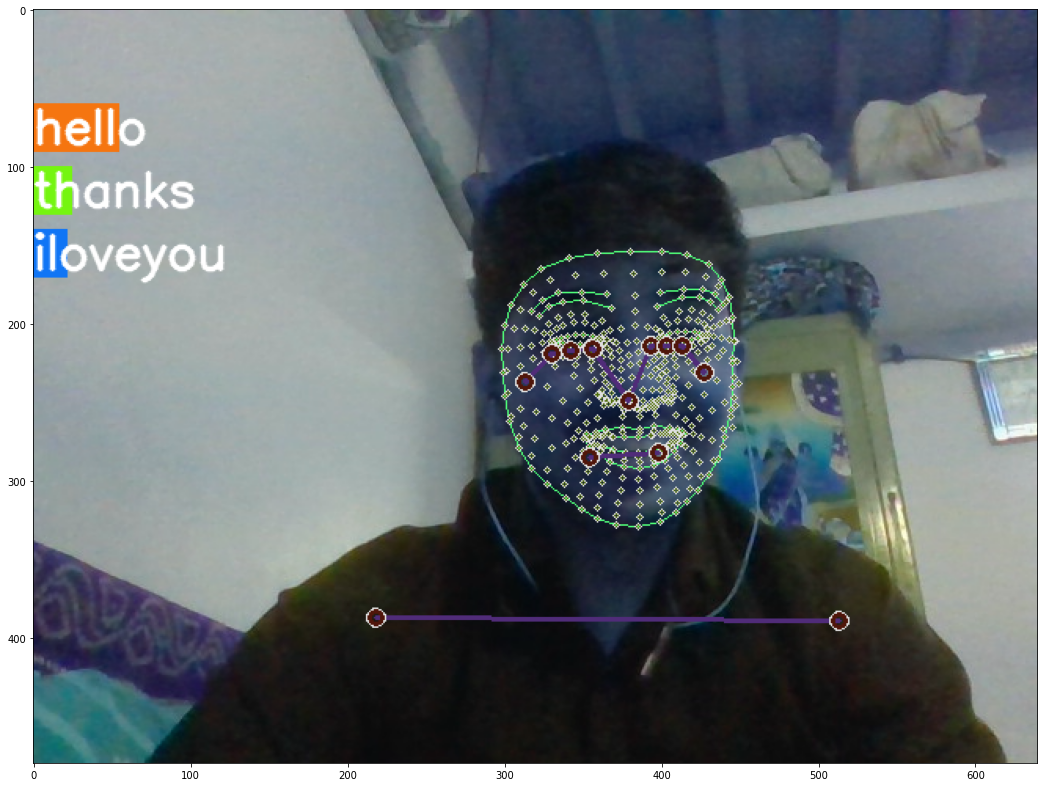

In [63]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [125]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe

KeyboardInterrupt: 

In [126]:
cap.release()
cv2.destroyAllWindows()